In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [7]:
df= pd.read_csv("C:/Users/ayush/train.csv")

In [8]:
df. shape

(800, 22)

In [9]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [11]:
df["age"]= df["age"].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int32  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [14]:
for col in df.columns:
    numerical_features= ["ID","age", "result"]
    if col not in numerical_features:
        print(col, df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [17]:
df= df.drop(columns= ["ID", "age_desc"])

In [19]:
df.shape

(800, 20)

In [20]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [21]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [22]:
mapping= {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}
df["contry_of_res"]= df["contry_of_res"].replace(mapping)

In [23]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [24]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [25]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Mean: 27.96375
Median: 24.0


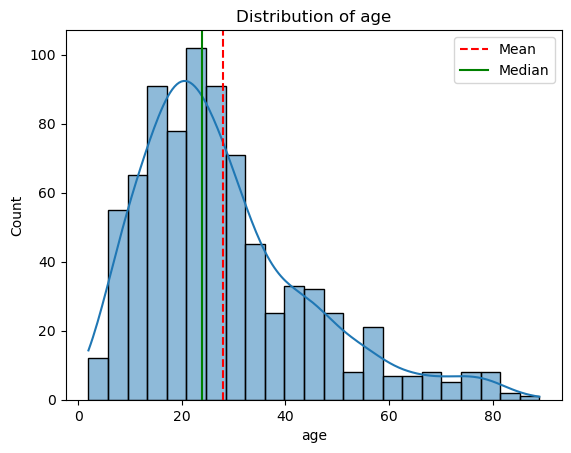

In [29]:
sns.histplot(df["age"], kde=True)
plt.title("Distribution of age")
age_mean= df["age"].mean()
age_median= df["age"].median()
print("Mean:", age_mean)
print("Median:", age_median)
plt.axvline(age_mean, color="red", linestyle="--", label= "Mean")
plt.axvline(age_median, color= "green", linestyle= "-", label= "Median")
plt.legend()
plt.show()

Mean: 8.556981915696248
Median: 9.6088938215


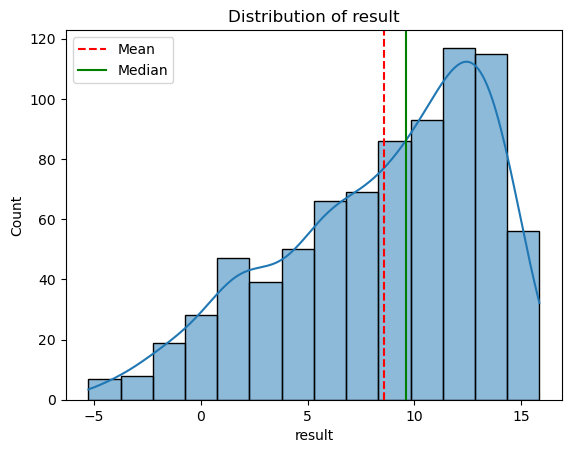

In [119]:
sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")
result_mean= df["result"].mean()
result_median= df["result"].median()
print("Mean:", result_mean)
print("Median:", result_median)
plt.axvline(result_mean, color="red", linestyle="--", label= "Mean")
plt.axvline(result_median, color= "green", linestyle= "-", label= "Median")
plt.legend()
plt.show()

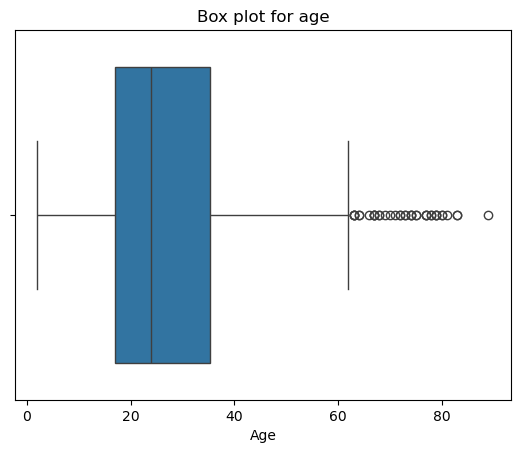

In [33]:
sns.boxplot(x= df["age"])
plt.title("Box plot for age")
plt.xlabel("Age")
plt.show()

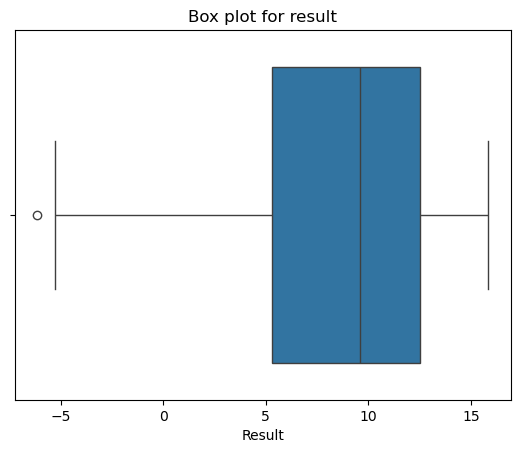

In [34]:
sns.boxplot(x= df["result"])
plt.title("Box plot for result")
plt.xlabel("Result")
plt.show()

In [35]:
Q1= df["age"].quantile(0.25)
Q3= df["age"].quantile(0.75)
IQR= Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR
age_outliers= df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]

In [37]:
len(age_outliers)

39

In [40]:
Q1= df["result"].quantile(0.25)
Q3= df["result"].quantile(0.75)
IQR= Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR
result_outliers= df[(df["result"]<lower_bound) | (df["result"]>upper_bound)]

In [41]:
len(result_outliers)

1

In [43]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

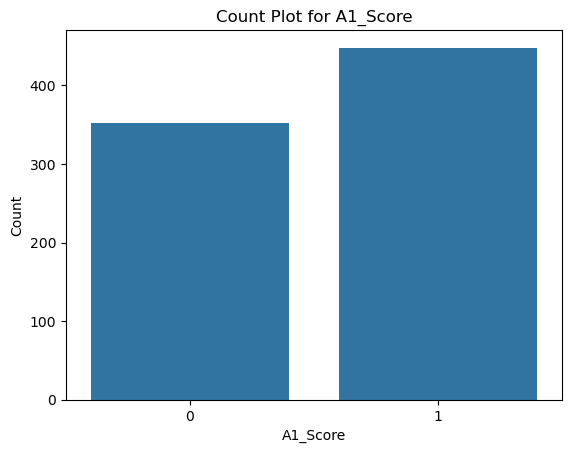

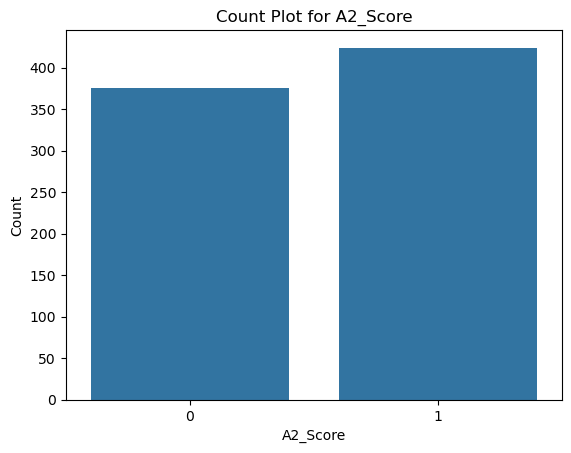

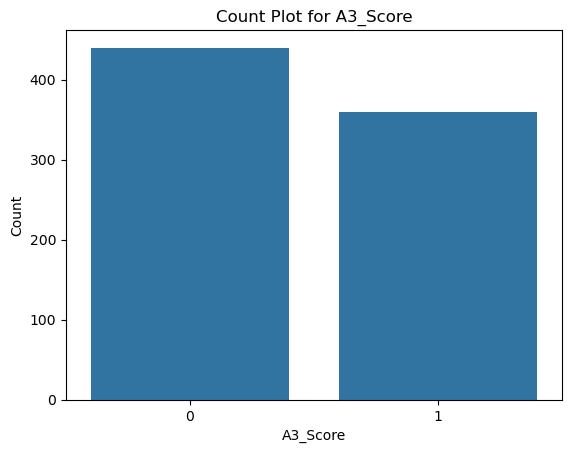

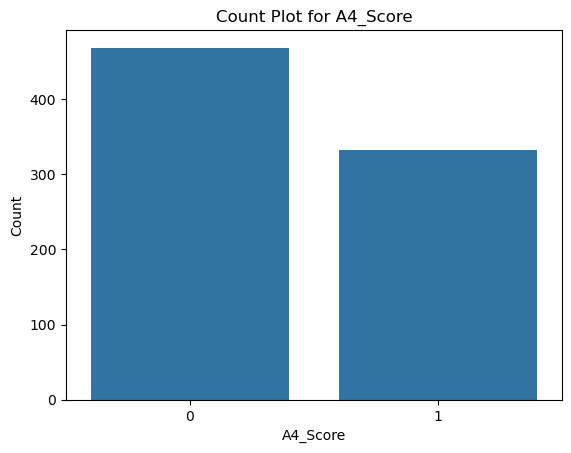

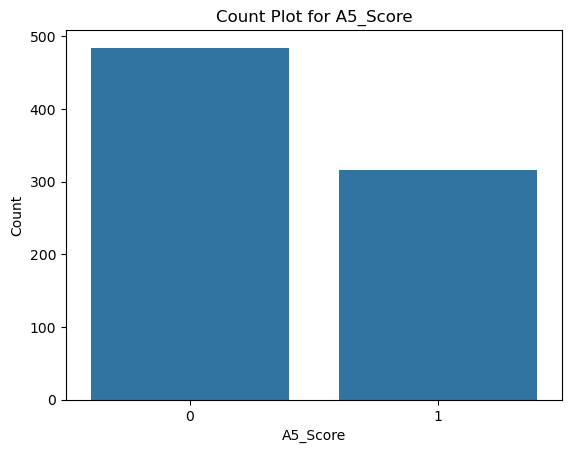

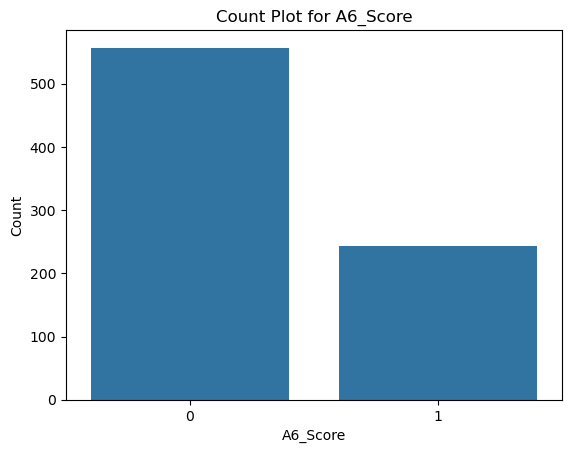

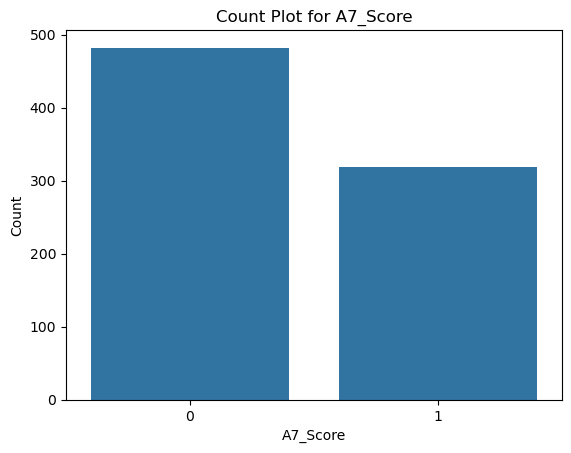

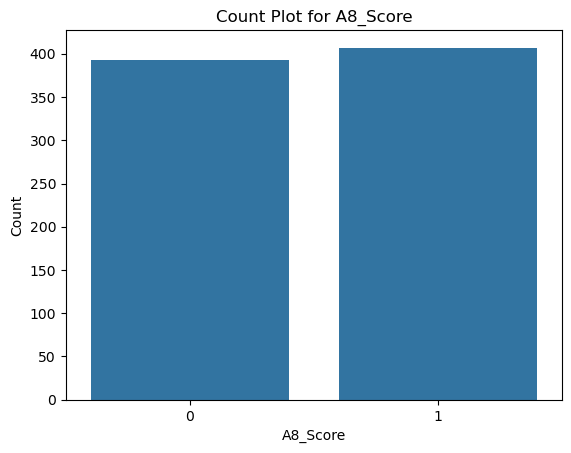

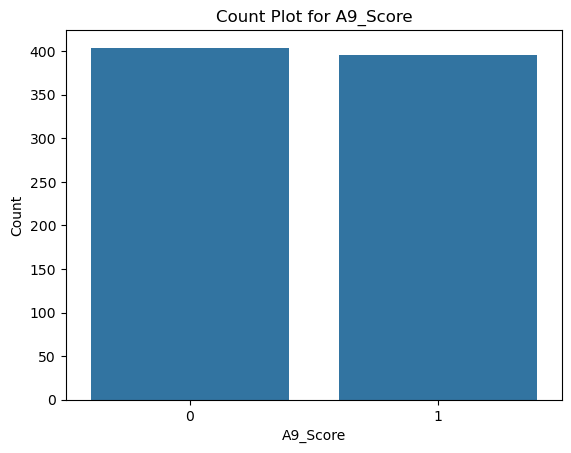

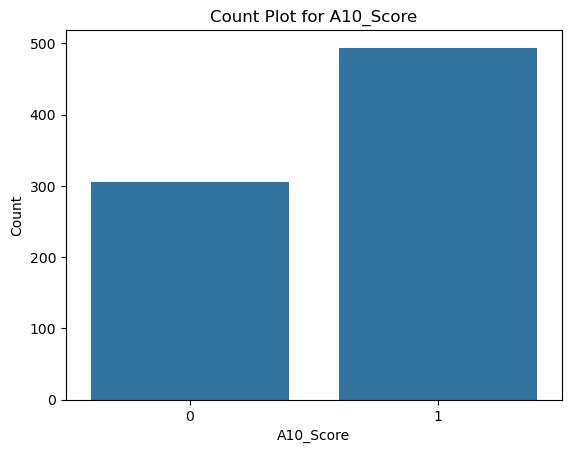

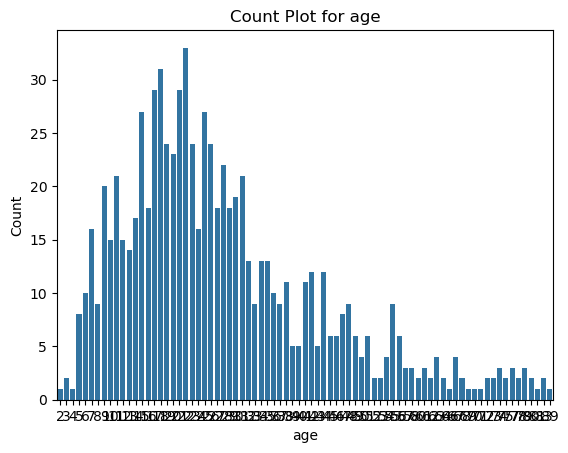

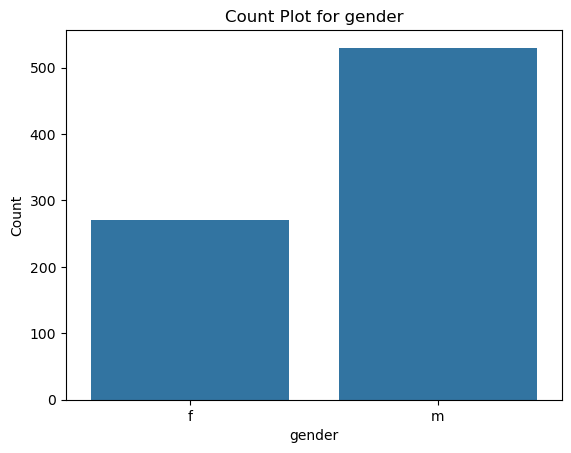

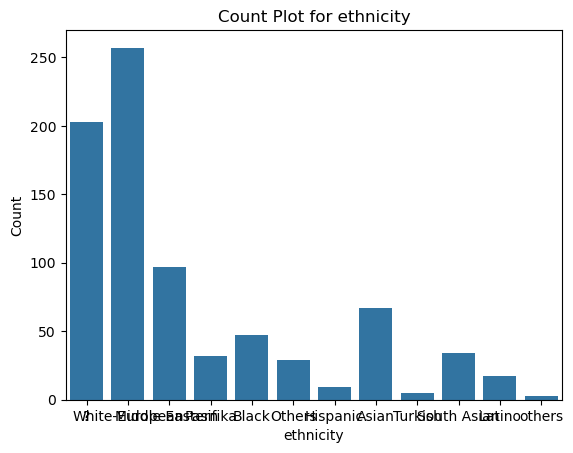

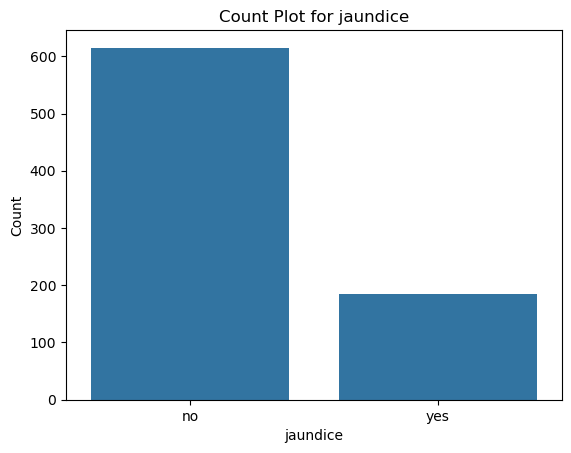

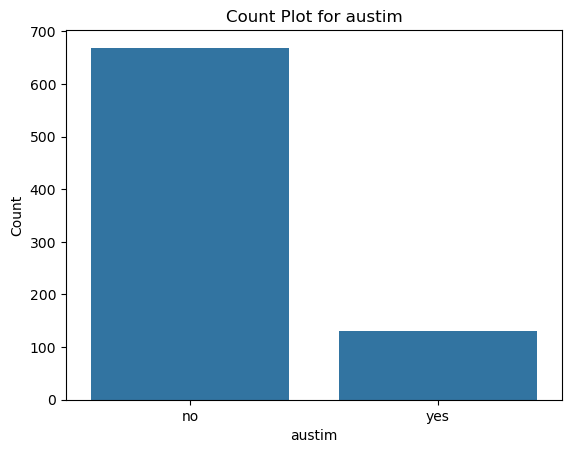

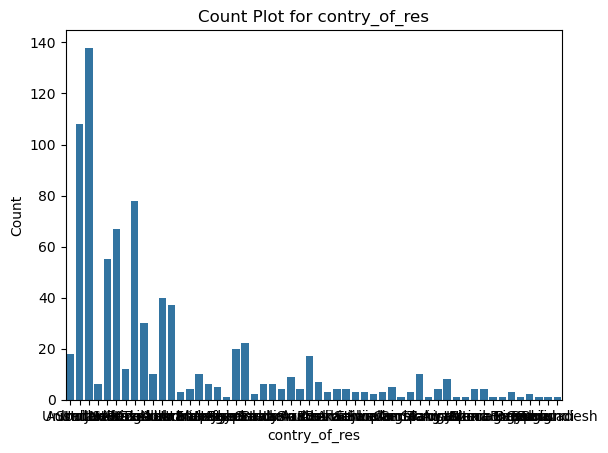

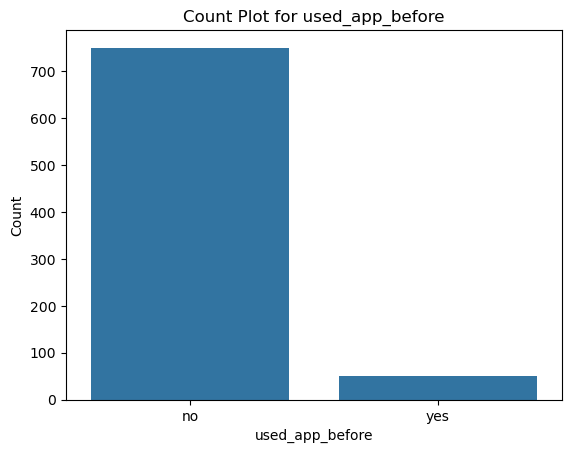

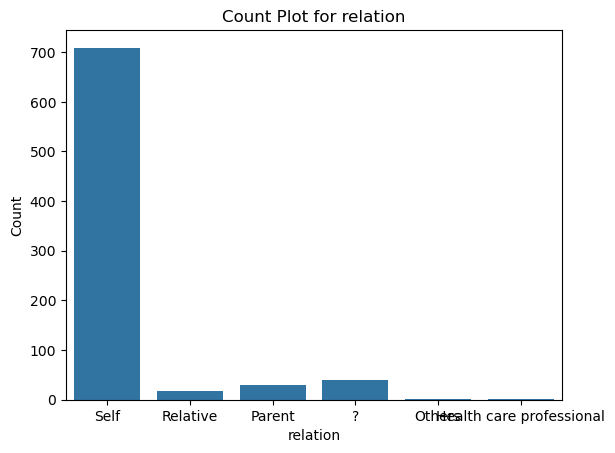

In [44]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']
for col in categorical_columns: 
    sns.countplot(x= df[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

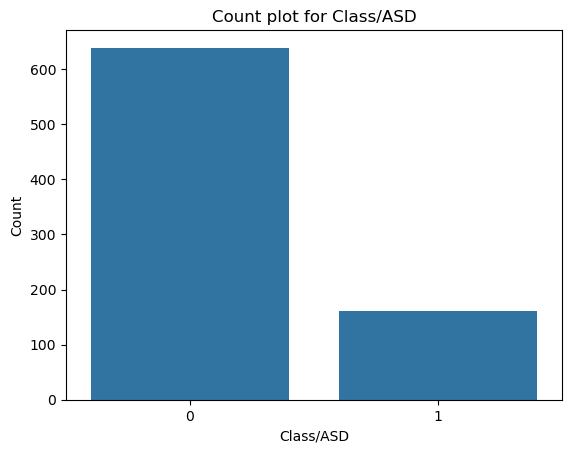

In [45]:
sns.countplot(x= df["Class/ASD"])
plt.title("Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [47]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [56]:
df["ethnicity"]= df["ethnicity"].replace({"?": "Others", "others": "Others"})

In [51]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [52]:
df["relation"]= df["relation"].replace(
    {"?": "Others",
     "Relative": "Others",
     "Parent": "Others",
     "Health care professional": "Others"}
)

In [57]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [58]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [59]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


In [61]:
object_columns= df.select_dtypes(include=["object"]).columns

In [62]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [64]:
encoders={}
for column in object_columns:
    label_encoder= LabelEncoder()
    df[column]= label_encoder.fit_transform(df[column])
    encoders[column]= label_encoder
with open("encoders.pkl","wb") as file:
    pickle.dump(encoders,file)

In [65]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [66]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


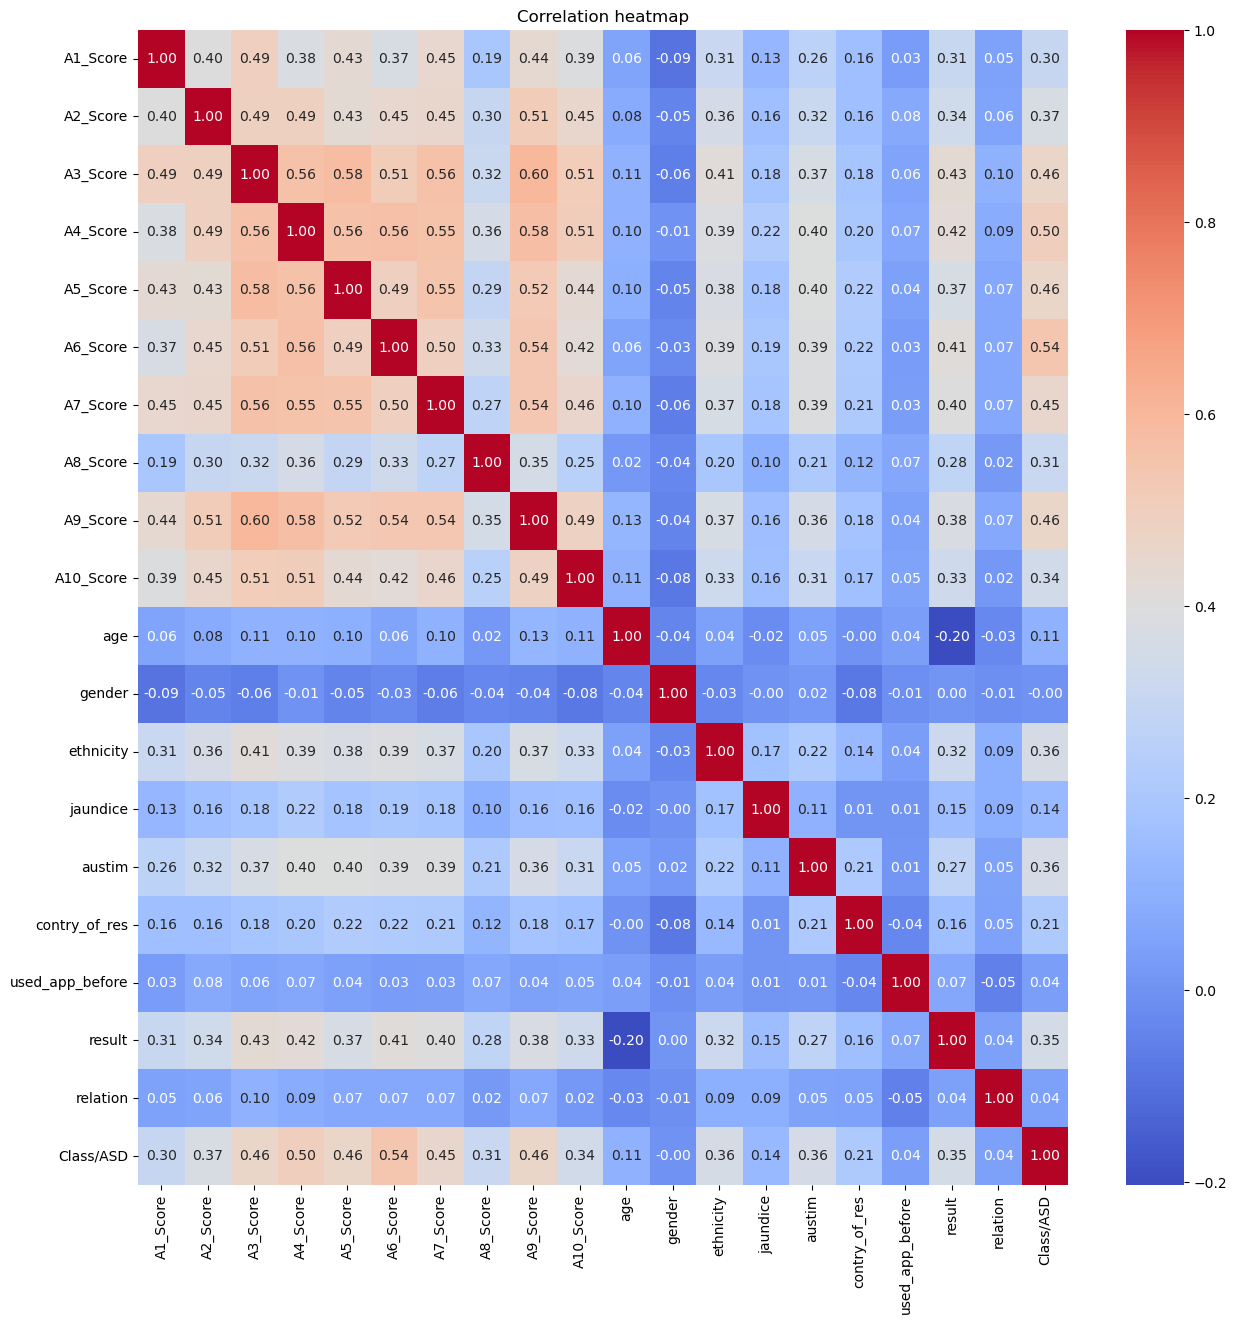

In [70]:
plt.figure(figsize= (15,15))
sns.heatmap(df.corr(), annot= True, cmap= "coolwarm", fmt= ".2f")
plt.title("Correlation heatmap")
plt.show()

In [71]:
def replace_outliers_with_median(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    median=df[column].median()
    df[column]= df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)
    return df

In [76]:
df= replace_outliers_with_median(df,"age")
df= replace_outliers_with_median(df,"result")

In [77]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [78]:
X= df.drop(columns=["Class/ASD"])
y= df["Class/ASD"]

In [79]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [80]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [81]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [82]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

In [83]:
smote= SMOTE(random_state=42)

In [84]:
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

In [86]:
print(y_train_smote.shape)

(1030,)


In [87]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


In [89]:
models= {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}
                                    

In [92]:
cv_scores={}
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")
    scores= cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring= "accuracy")
    cv_scores[model_name]= scores
    print(f"{model_name}Cross-Validation Accuracy: {np.mean(scores): .2f}")
    print("-"*50)

Training Decision Tree with default parameters...
Decision TreeCross-Validation Accuracy:  0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random ForestCross-Validation Accuracy:  0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoostCross-Validation Accuracy:  0.90
--------------------------------------------------


In [93]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

In [105]:
decision_tree= DecisionTreeClassifier(random_state=42)
random_forest= RandomForestClassifier(random_state=42)
xgboost_classifier= XGBClassifier(random_state=42)


In [106]:
param_grid_dt= {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10,20,30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}
param_grid_rf= {
    "n_estimators": [50,100,200,500],
    "max_depth": [None, 10,20,30],
    "min_samples_split": [2,5,10], 
    "min_samples_leaf": [1,2,4],
    "bootstrap": [True, False]
}
param_grid_xgboost_classifier= {
    "n_estimators": [50,100,200,500],
    "max_depth": [3, 5,7,10],
    "learning_rate": [0.01,0.1,0.2,0.3], 
    "subsample": [0.5,0.7,1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [107]:
random_search_dt= RandomizedSearchCV(estimator= decision_tree, param_distributions= param_grid_dt, n_iter=10, cv=5, scoring= "accuracy", random_state=42)
random_search_rf= RandomizedSearchCV(estimator= random_forest, param_distributions= param_grid_rf, n_iter=10, cv=5, scoring= "accuracy", random_state=42)
random_search_xgb= RandomizedSearchCV(estimator= xgboost_classifier, param_distributions= param_grid_xgboost_classifier, n_iter=10, cv=5, scoring= "accuracy", random_state=42)

In [108]:
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [112]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)


DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)
0.8699029126213592
RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
0.9223300970873787


In [113]:
best_model= None 
best_score= 0
if random_search_dt.best_score_> best_score:
    best_model= random_search_dt.best_estimator_
    best_score=random_search_dt.best_score_
if random_search_rf.best_score_> best_score:
    best_model= random_search_rf.best_estimator_
    best_score=random_search_rf.best_score_
if random_search_xgb.best_score_> best_score:
    best_model= random_search_xgb.best_estimator_
    best_score=random_search_xgb.best_score_


In [114]:
print(f"Best Model: {best_model}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
Best cross-validation accuracy: 0.92


In [115]:
with open("best_model.pkl","wb") as f:
    pickle.dump(best_model, f)

In [118]:
y_test_pred= best_model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print("Classification report:", classification_report(y_test, y_test_pred))

Accuracy score: 0.8375
[[109  15]
 [ 11  25]]
Classification report:               precision    recall  f1-score   support

           0       0.91      0.88      0.89       124
           1       0.62      0.69      0.66        36

    accuracy                           0.84       160
   macro avg       0.77      0.79      0.78       160
weighted avg       0.84      0.84      0.84       160

